# **build a neural network from scratch to predict housing**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/HousingData.csv")
print(df.to_string())

         CRIM     ZN  INDUS  CHAS     NOX     RM    AGE      DIS  RAD  TAX  PTRATIO       B  LSTAT  MEDV
0     0.00632   18.0   2.31   0.0  0.5380  6.575   65.2   4.0900    1  296     15.3  396.90   4.98  24.0
1     0.02731    0.0   7.07   0.0  0.4690  6.421   78.9   4.9671    2  242     17.8  396.90   9.14  21.6
2     0.02729    0.0   7.07   0.0  0.4690  7.185   61.1   4.9671    2  242     17.8  392.83   4.03  34.7
3     0.03237    0.0   2.18   0.0  0.4580  6.998   45.8   6.0622    3  222     18.7  394.63   2.94  33.4
4     0.06905    0.0   2.18   0.0  0.4580  7.147   54.2   6.0622    3  222     18.7  396.90    NaN  36.2
5     0.02985    0.0   2.18   0.0  0.4580  6.430   58.7   6.0622    3  222     18.7  394.12   5.21  28.7
6     0.08829   12.5   7.87   NaN  0.5240  6.012   66.6   5.5605    5  311     15.2  395.60  12.43  22.9
7     0.14455   12.5   7.87   0.0  0.5240  6.172   96.1   5.9505    5  311     15.2  396.90  19.15  27.1
8     0.21124   12.5   7.87   0.0  0.5240  5.631  100.0

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 603.6989 - mae: 22.5189 - val_loss: 531.1754 - val_mae: 21.3954
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 539.2189 - mae: 21.2601 - val_loss: 507.2516 - val_mae: 20.7806
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 546.4849 - mae: 21.1522 - val_loss: 478.4894 - val_mae: 20.0137
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 536.3860 - mae: 21.0109 - val_loss: 442.5416 - val_mae: 19.0022
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 477.5698 - mae: 19.1002 - val_loss: 398.4984 - val_mae: 17.7581
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 442.2670 - mae: 18.4035 - val_loss: 346.3523 - val_mae: 16.3675
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 391.5668 - mae: 17.0308 - val_loss: 288.3815 - val_mae: 14.8284
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 330.1003 - mae: 15.4238 - val_loss: 229.2819 - val_mae: 13.0896
Epoch 9/15
11/11 ━━━━━━

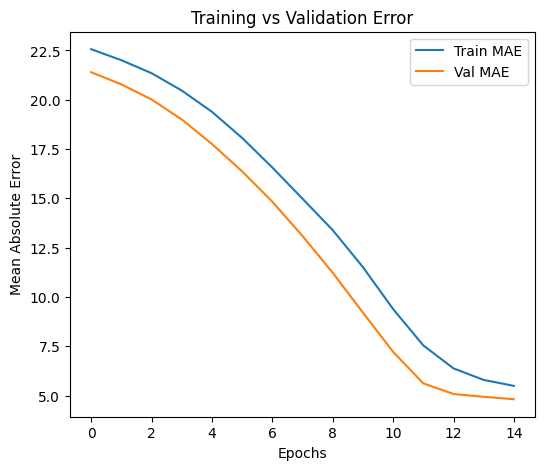

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
#step # 1 :data set is already loaded

#DATA PREPROCESSING
# Handle missing values                           #in sometime our data output is like NAN for facing this problem we use this function
df.fillna(df.mean(),inplace=True)

X=df.drop('MEDV',axis=1)
y=df['MEDV']

#step#2:feature scaling
scalar=StandardScaler()
scaled_data=scalar.fit_transform(X)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y,test_size=0.2, random_state=42)
#step # 4:
model=Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(12,activation='relu'),
    Dense(124,activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
# Step 6: Train model
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=32, verbose=1)
# Step 7: Evaluate
loss, mae= model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.3f}")
# Step 8: Plot performance
plt.figure(figsize=(6,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training vs Validation Error')
plt.show()